In [26]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [61]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [62]:
dataf = "../../data/instrumentationoverhead.csv"

In [63]:
!sha256sum $dataf

3002c7eb26e395f450a0e9f624fbf00db51842888cfe800ea59c799d606cc517  ../../data/instrumentationoverhead.csv


In [64]:
df = pd.read_csv(dataf)
df.index = df['workload']
del df['workload']
del df['msynctime']

In [65]:
df

,uninstrumented,instrumented
workload,,
a,970572460,1050471245
b,1040678777,1024904959
c,1030258852,1031875765
d,1190830877,1209513873
e,382885132,412142876
f,1227746949,1291105952
g,881894884,999309556


Plot saved as `plots/pathfinding/instrumentationoverhead.png`

Plot saved as `plots/pathfinding/instrumentationoverhead.png`

Using pdfcrop on `plots/pathfinding/instrumentationoverhead.png` with command `pdfcrop plots/pathfinding/instrumentationoverhead.pdf plots/pathfinding/instrumentationoverhead.pdf`

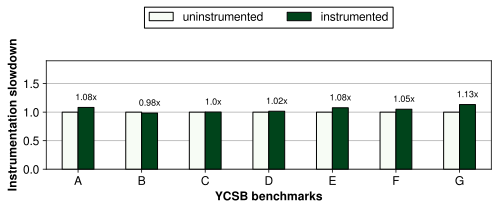

In [73]:
plt.rcParams["font.family"] = "freesans"
df_norm = capitalize_index(df_norm)
ax = df_norm.plot.bar(**Fig.get_kwargs(cmap='Greens'))
f = Fig(ax)
ax.set_ylim((0, 1.9))

f.fmt_legend()
# f.fmt_label('YCSB benchmarks', 'Relative performance')
f.fmt_label('YCSB benchmarks', 'Instrumentation slowdown')
f.add_bar_labels([False, True], precision=2, fontsize=fontsize-2, over_fig=False, alpha=0)
f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(0, 1.7, 0.5))
save_fig('instrumentationoverhead')

In [11]:
df_norm

,pmdk,snashot,msync
a,1.0,0.912970,NaN
b,1.0,0.883876,NaN
c,1.0,0.881197,NaN
d,1.0,0.910528,NaN
e,1.0,0.718653,NaN
f,1.0,0.889625,NaN
g,1.0,1.086164,NaN
